# Features that affect the loan status of borrowers
## by Ebubechukwu Princewill Okoye

## Investigation Overview

In this investigation, i wanted to know what features in the prosper loan dataset affected the loan status of a borrower. The main features of focus were; income range, employment status, income verifiable, investors, loan original amount, and listing category.

I start by introducing the loan status feature. Then, using barplot, i check for the effect of avg. number of investors on loan status. Subsequently, using the heatmap and boxplot i presented the effects other chosen features have on loan status. Finally, i check for the interaction effect of income verifiable and average number of investors on loan status using a barplot.

## Dataset Overview

The dataset comprises of loan status and 80 other features of 113937 entries, generated from prosper loan company.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperloanData.csv')

In [3]:
## Preliminary wrangling
#Change column names to lower case formats all-through
prosper_loan = prosper_loan.rename(columns = lambda x:x.lower())


## Distribution of Loan Status

Plotting a barchart of the loan status observation in a decreasing order, it is seen that greater number of borrowers were under the current loan status.

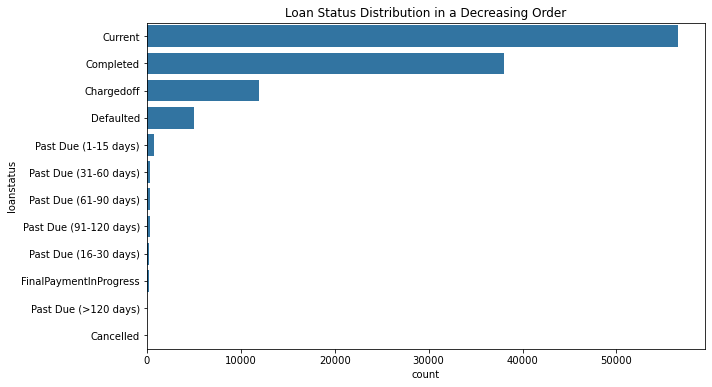

In [4]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
order = prosper_loan.loanstatus.value_counts().index
sb.countplot(data = prosper_loan, y = 'loanstatus', color = base_color, order = order)
plt.title('Loan Status Distribution in a Decreasing Order');

## Loan Status Vs Investors

A plot between loan status and average number of investors revealed that those patronised by low number of investors on the average were not granted loan.

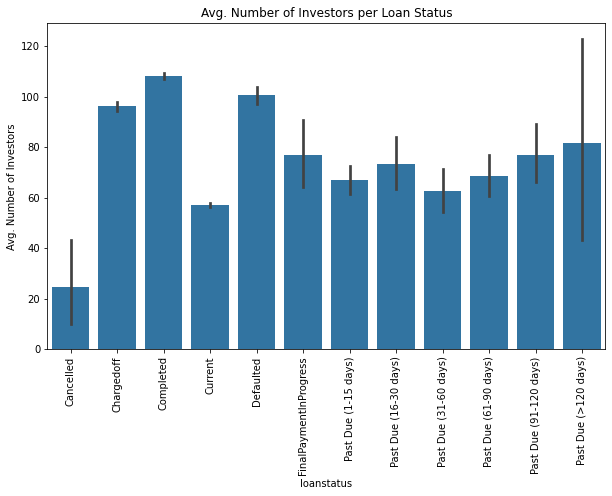

In [5]:
order = prosper_loan.groupby('loanstatus').size().index
plt.figure(figsize=(10,6))
sb.barplot(data = prosper_loan, x = 'loanstatus', y = 'investors', color = base_color, order = order)
plt.ylabel('Avg. Number of Investors')
plt.xticks(rotation=90)
plt.title('Avg. Number of Investors per Loan Status');

In [6]:
#wrapping my heatmap plot in a function to avoid repetition
def heatmap(data):
    plt.figure(figsize = [10,7])
    sb.heatmap(data, annot = True, fmt = '.0f');
    

def box_plot(x_col, y_col, order_col):
    plt.figure(figsize = (10,6))
    sb.boxplot(data = prosper_loan, x = x_col, y = y_col, color = base_color, order = prosper_loan.groupby(order_col).size().index);

## Loan Status Vs Employment Status

A heatmap between the two features showed that most individuals Employed or working Full-time had a loan status of current and completed. It also showed that those that didn't provide their employment status at the time the data was pulled were not under the current loan status.

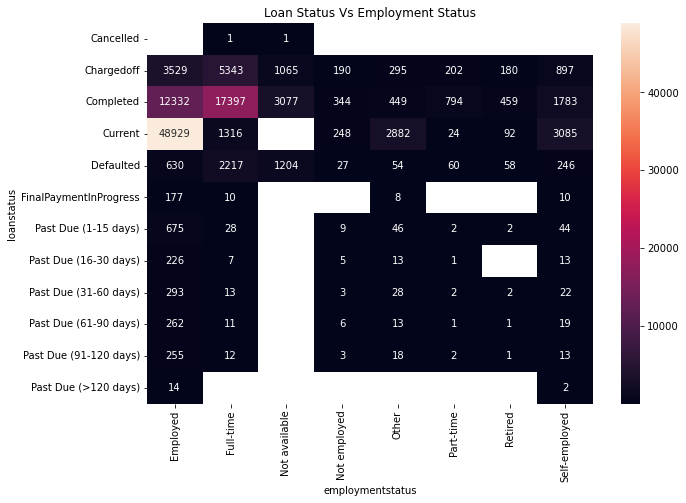

In [7]:
#Checking the relationship between loan status and employmentstatus
#summarising the counts into a matrix that can be plotted via heatmap
ct_counts = prosper_loan.groupby(['loanstatus','employmentstatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
#pivot the counts dataframe
ct_counts = ct_counts.pivot(index = 'loanstatus', columns = 'employmentstatus', values = 'count')

#plotting the heatmap
heatmap(ct_counts)
plt.title('Loan Status Vs Employment Status');

## Loan Status Vs Income Range

Most individuals found in the high income ranges also fall under current and completed loan status.

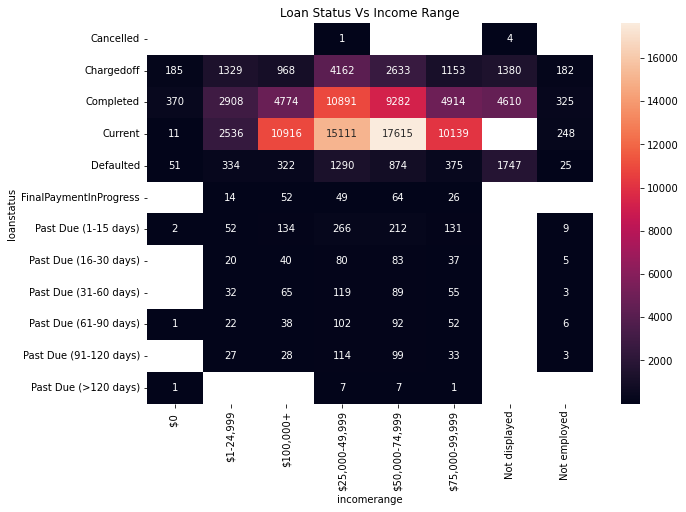

In [8]:
#Investigating the relationship between loan status and income range
#summarising the counts into a matrix that can be plotted via heatmap
ct_counts = prosper_loan.groupby(['loanstatus','incomerange']).size()
ct_counts = ct_counts.reset_index(name = 'count')
#pivot the counts dataframe
ct_counts = ct_counts.pivot(index = 'loanstatus', columns = 'incomerange', values = 'count')

#plotting the heatmap
heatmap(ct_counts)
plt.title('Loan Status Vs Income Range');

## Loan Status Vs Loan Original Amount

Those with current loan status applied for higher loan amounts unlike those that their loan was not approved(cancelled).

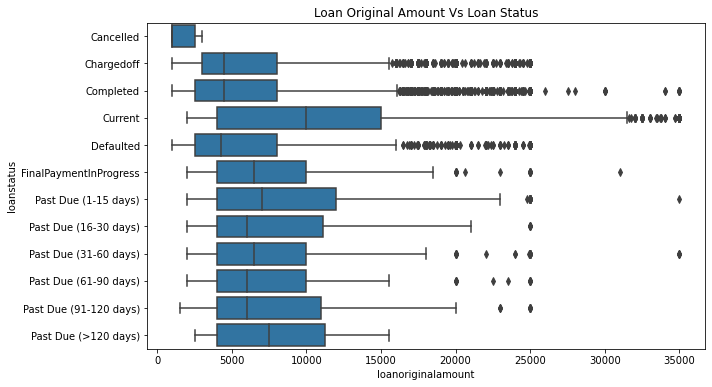

In [9]:
#Checking the interaction between loan status and loan original amount
box_plot('loanoriginalamount', 'loanstatus', 'loanstatus')
plt.title('Loan Original Amount Vs Loan Status');

## Loan Status Vs Income Verifiable

Plotting a proportion barchart shows that the proportion of those with a verifiable income is higher than the proportion of those with none in the current and completed loan status.

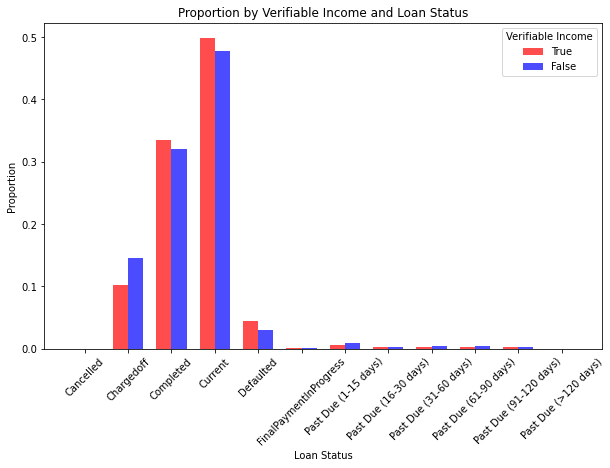

In [10]:
#investigating further using proportions, since there are far way more persons 
# with a verifiable income document as seen in the univariate exploration section
verified_income_count = prosper_loan.groupby(['incomeverifiable', 'loanstatus']).size()
verified_income_total = prosper_loan.groupby('incomeverifiable').size()

#Getting the proportion of those with no verifiable document for each loan status
unverified_proportion = verified_income_count[0]/verified_income_total[0]

#Getting the proportion of those with a verifiable document for each loan status
verified_proportion = verified_income_count[1]/verified_income_total[1]

width = 0.35
index = np.arange(len(verified_proportion))

#Using matplotlib.pyplot, plot a barchart to express proportions
plt.figure(figsize = (10,6))     #Figure size
verified_bar = plt.bar(index, verified_proportion, width, color = 'r', alpha = .7, label = 'True')
male_bar = plt.bar(index+width, unverified_proportion, width, color = 'b', alpha = .7, label = 'False')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.title('Proportion by Verifiable Income and Loan Status')
plt.legend(title = 'Verifiable Income')
#xticks location
locations = index + width / 2
#xticks label
labels = prosper_loan.groupby('loanstatus').size().index
plt.xticks(locations, labels, rotation=45);

## Loan Status Vs Listing Category

The listing category feature depicts the category of the listing that the borrower selected when posting their listing.

The heatmap showed that very few loans were cancelled using the listing category as a basis. And out of the many persons on current loan status, very few(only 12) persons that didn't indicate a reason(not available) were granted loans. Also those with reasons such as for personal loan and student loan were not on current loan status.

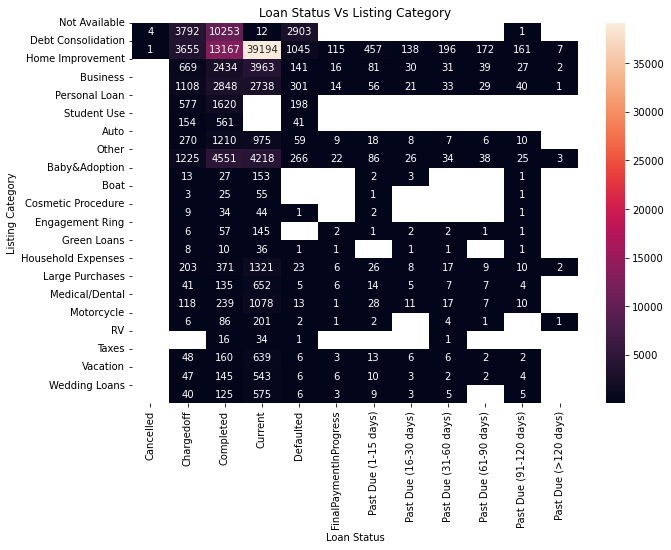

In [11]:
#Investigating the relationship between loan status and listing category
#summarising the counts into a matrix that can be plotted via heatmap
ct_counts = prosper_loan.groupby(['loanstatus','listingcategory (numeric)']).size()
ct_counts = ct_counts.reset_index(name = 'count')
#pivot the counts dataframe
ct_counts = ct_counts.pivot(index = 'listingcategory (numeric)', columns = 'loanstatus', values = 'count')

#plotting the heatmap
heatmap(ct_counts)
plt.title('Loan Status Vs Listing Category')
plt.ylabel('Listing Category')
plt.xlabel('Loan Status')
locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
labels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 
          'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses',
          'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
plt.yticks(locations, labels, rotation = 0);

## Loan Status by Investors and Income Verifiable

 The average number of investors for those with a verifiable income document is higher for most loan status. Most especially the completed loan status.

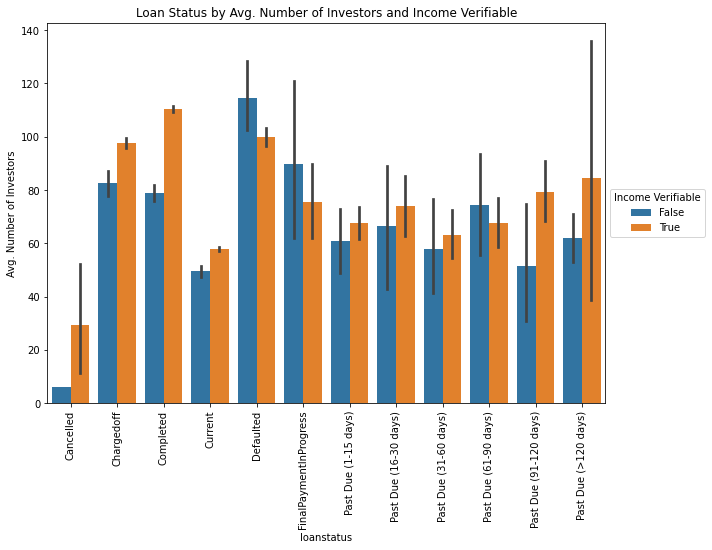

In [12]:
order = prosper_loan.groupby('loanstatus').size().index
plt.figure(figsize=[10,7])
sb.barplot(data = prosper_loan, x = 'loanstatus', y = 'investors', hue = 'incomeverifiable', order = order)
plt.ylabel('Avg. Number of Investors')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Income Verifiable')
plt.xticks(rotation=90)
plt.title('Loan Status by Avg. Number of Investors and Income Verifiable');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_ii_slide_deck_template.ipynb>.ipynb --to slides --post serve --no-input --no-prompt